In [1]:
%matplotlib inline

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'src/')))
from sgpi.plot import *

import pandas as pd
import pysgpp as sg

from fractions import Fraction

In [2]:
def get_grid_points(grid):
    storage = grid.getStorage()
    indices = []
    for i in range(0, grid.getSize()):
        index = storage.get(i)
        x_pos = index.getCoord(0)
        y_pos = index.getCoord(1)
        level_sum = index.getLevelSum()
        dim = index.getDimension()
        prior = 0.25**(level_sum-dim)
        indices.append( (x_pos,y_pos, prior) )
    return indices

# Diagonal Grid
1. Create grid.
2. Find bias for each grid point.
3. Plot grid, with each bias in dif. col.

In [3]:
def plot_diagonal(level, T):
    grid = sg.Grid.createModLinearGrid(2)
    gen = grid.getGenerator()
    gen.regular(level,T)
    indices = get_grid_points(grid)
    df = pd.DataFrame(indices, columns=['x', 'y', 'prior'])
    
    fig, ax = plt.subplots(figsize=(10, 10))
    #ax.set_title("{} gridpoints for level = {} with T = {}".format(size, level, T))
    ax.set_axis_off()
    ax.set(adjustable='box-forced', aspect='equal')
    for name, group in df.groupby('prior'):
        ax.plot(group['x'], group['y'], label=Fraction(name), linewidth=0, marker='$ {} $'.format(Fraction(name)),
                markersize=30)
    return fig, ax

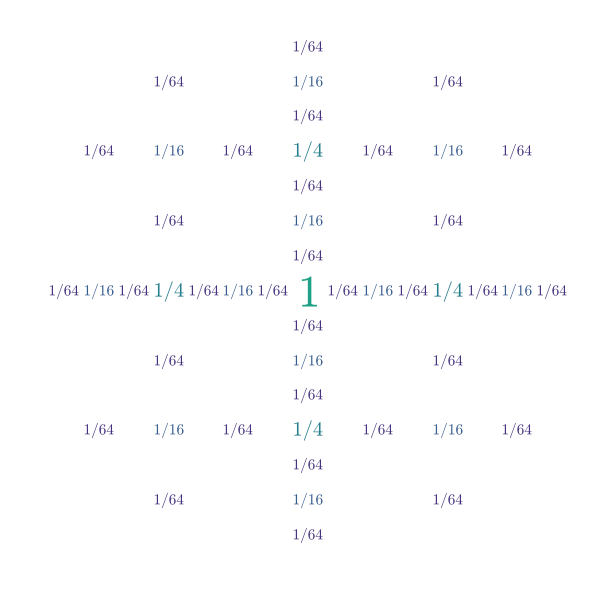

In [4]:
fig, ax = plot_diagonal(4, 0)
fig.savefig("../writing/thesis/figures/diagonal.pdf", bbox='tight')

# Adaptivity
1. Create grid.
2. Save list of grid points.
3. Adapt step.
4. Save list of grid points, maybe go to 3.
5. Plot grid, new points in diff. col


In [5]:
def get_random_weights(grid):
    np.random.seed(42)
    weights = np.random.random(grid.getSize())
    return sg.DataVector(weights)

def list_diff(a, b):
        b = set(b)
        return [i for i in a if i not in b]

In [106]:
def plot_refinement(level, num_points):
    grid = sg.Grid.createModLinearGrid(2)
    gen = grid.getGenerator()
    gen.regular(level)
    weights = get_random_weights(grid)

    grid_0 = get_grid_points(grid)

    adapt = sg.SurplusRefinementFunctor(weights, refinements_num=num_points)
    gen.refine(adapt)
    grid_1 = get_grid_points(grid)

    gen.refine(adapt)
    grid_2 = get_grid_points(grid)

    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10,50))
    for ax in axs:
        ax.set_axis_off()
        ax.set(adjustable='box-forced', aspect='equal')

    args = {'marker': 'o',
            's': 60,
            'edgecolor': 'black',
            'linewidth': '0'}    
        
    x, y, _ = zip(*grid_0)
    axs[0].scatter(x, y, c='grey', **(args))
    axs[1].scatter(x, y, c='grey', **args)
    axs[2].scatter(x, y, c='grey', **args)


    x, y, _ = zip(*list_diff(grid_1, grid_0))
    axs[1].scatter(x, y, c='red', **args)
    axs[2].scatter(x, y, c='grey', **args)

    x, y, _ = zip(*list_diff(grid_2, grid_1))
    axs[2].scatter(x, y, c='red', **args)
    return fig, axs

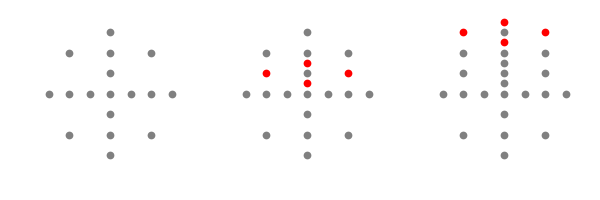

In [107]:
fig, ax = plot_refinement(3, 1)
fig.savefig("../writing/thesis/figures/adaptivity.pdf", bbox='tight')

In [17]:
def plot_generalized(level, T):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    ax.set(adjustable='box-forced', aspect='equal')
    grid = sg.Grid.createModLinearGrid(2)
    gen = grid.getGenerator()
    gen.regular(level, T)
    points = get_grid_points(grid)
    x, y, _ = zip(*points)
    ax.scatter(x,y)
    return fig, ax

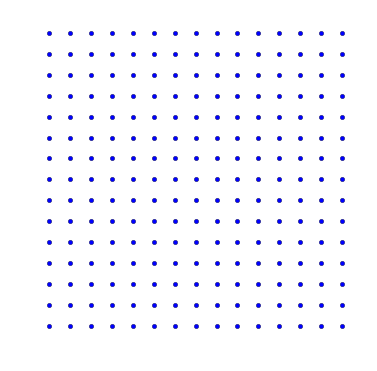

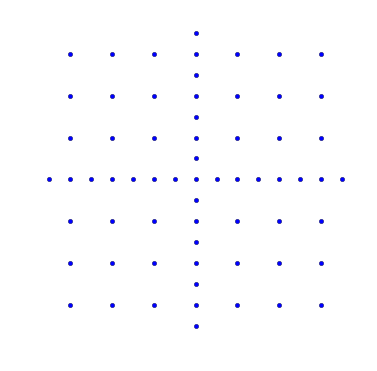

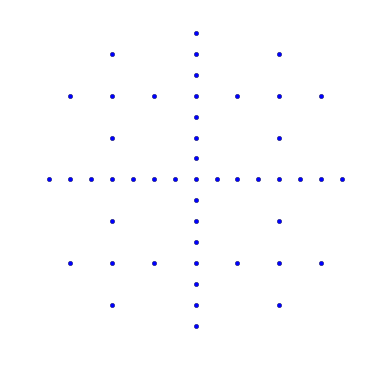

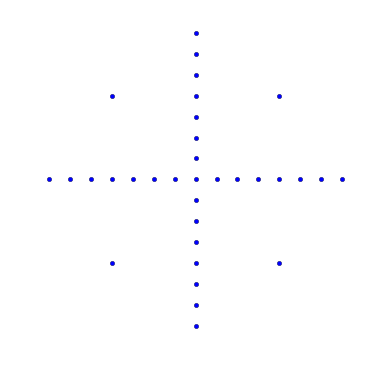

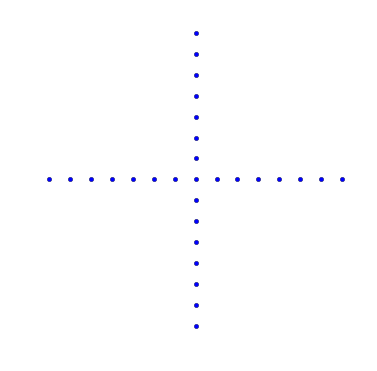

In [29]:
for T in [float('-inf'), -4, 0, 0.5, 1.0]:
    plot_generalized(4, T)